# Histogram Plot (Frekans Dağılım Grafiği)

Sayısal verilerin belirli aralıklardaki dağılımının tekrar sayısının grafik olarak gösterilmesidir. Bu grafik sayesinde elimizdeki veri içinde bir değerin hangi değerlerde yoğunlaştığını rahatlıkla görebiliriz. Histogram grafik çizdirmek için <code>df.plot(kind="hist")</code> parametresi yada <code>df.plot.hist()</code> kullanılır

Örnekte kullandığımız veri setine ulaşmak için: 

https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp

In [1]:
import numpy as np
import pandas as pd

## Datanın oluşturulması

In [2]:
# Grafikte kullanacağımız datayı yükleyelim.
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# Bize gerekli olmayan kolonları silelim
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# Kolon isimlerini değiştirelim
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# Kolon isimlerini string yapalım
df_can.columns = list(map(str, df_can.columns))
# Country kolonunu index yapalım
df_can.set_index('Country', inplace=True)
# Index adını silelim
df_can.index.name=None
# Göçmen sayısın toplamını gösteren Total isimli bir kolon ekleyelim
df_can['Total'] = df_can.sum(axis=1)
# Grafik çizerken kullanmak üzere years adınsa bir dizi oluşturalım
years = list(map(str, range(1980, 2014)))

## Grafiğin oluşturulması

In [3]:
%matplotlib inline

import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.style.use("ggplot")

Örnek olarak 2013 yılında Kanada'ya gelen göçmenlerin sayısının kaç adet ülkeden geldiğine dair bir inceleme yapacağız. Bunun için öncelikli olarak göçmen sayısı verisini belirli aralıklara böleceğiz. Yani 2013 yılında Kanada'ya gelen göçmen sayılarının en küçüğü ile en büyüğü arasını belirli aralıklara bölüp o aralıklara kaç tane ülke denk geldiğine bakacağız. Bunun için <code>numpy.histogram</code> metodunu kullanacağız.

In [4]:
# np.histogram 2 değer geri döner 
count, bin_edges= np.histogram(df_can["2013"])

print("Frekans Sayısı :",count) # Her bir aralıkta kaç tane değer olduğunu verir.
print("Bin Aralıkları :",bin_edges) # Aralıkların başlangıç ve bitiş değerlerini verir.

Frekans Sayısı : [178  11   1   2   0   0   0   0   1   2]
Bin Aralıkları : [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Histogram metodu ***default olarak 10 adet*** aralık yaratır. Bizim örneğimiz için yukarındaki değerler ilk 4 değer için bize şunu söylüyor.

* 0 ile 3415.9 arasında göçmen gelen ülkelerin sayısı 178
* 3412.9 ile 6825.8 arasında göçmen gelen ülkelerin sayısı 11
* 6825.8 ile 10238.7 arasında göçmen gelen ülkelerin sayısı 1
* 10238.7 ile 13651.6 arasında göçmen gelen ülkelerin sayısı 0

Şimdi histogram grafik çizdirelim önce numpy ile oluşturduğumuz aralıkları kullanmadan sonra oluşturduğumuz aralıkları kullanarak grafik çizdireceğiz.

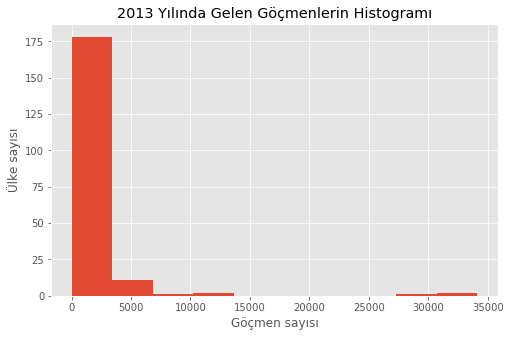

In [5]:
#np.histogram() değerleri kullanılmadan
df_can["2013"].plot(kind="hist",figsize=(8,5))

plt.title("2013 Yılında Gelen Göçmenlerin Histogramı")
plt.xlabel("Göçmen sayısı")
plt.ylabel("Ülke sayısı")

plt.show()

Yukarıdaki grafiğe dikkatli bakılacak olursa değer dönüşümlerinin np.histogram() ile bulduğumuz aralıklar ile olduğu görülür. Bununla birlikte grafiğin X ekseni 5000'lik bloklar ile bölündüğü için grafik çok iyi durmuyor. İşte bu sebeple daha önce oluşturduğumuz ***bin_edges*** değerini <code>xticks</code> parmetresine atayarak grafik oluştururuz. Bu şekilde grafiğimiz ölçeği ile histogram aralıklarımız üst üste gelecek ve grafiğimiz daha iyi okunacaktır.

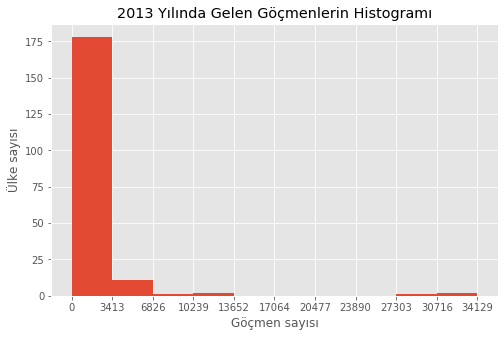

In [6]:
df_can["2013"].plot(kind="hist",figsize=(8,5),xticks=bin_edges)

plt.title("2013 Yılında Gelen Göçmenlerin Histogramı")
plt.xlabel("Göçmen sayısı")
plt.ylabel("Ülke sayısı")

plt.show()

### Çoklu histogram oluşturulması

Örnek olarak Denmark, Norway, Sweden için 1980-2013 yılları arasındaki göçmen dağılımını incelemeye çalışalım.

In [7]:
#Bu üç üldeken oluşan veri setine bakalım.
df_can.loc[["Denmark","Norway","Sweden"],years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


Bu veri setinin grafiğini bu hali ile çizdirmeye çalışırsak, her sene için bu üç ülkenin olup olmadığına dair bir grafikler demeti çizecektir. Buda bizim istediğimiz şey olmadığı için önce bu veriyi istediğimiz grafiği üretecek hale dönüştürmemiz gerekiyor. Bunun için matrisi Transpose edeceğiz.

In [8]:
df_t=df_can.loc[["Denmark","Norway","Sweden"],years].transpose()
df_t.head()

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


Şimdi grafiği çizdirelim.

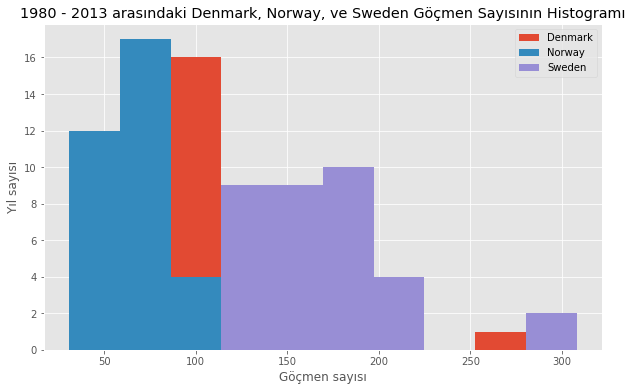

In [9]:
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('1980 - 2013 arasındaki Denmark, Norway, ve Sweden Göçmen Sayısının Histogramı')
plt.ylabel('Yıl sayısı')
plt.xlabel('Göçmen sayısı')

plt.show()

Grafik doğru verileri gösteriyor fakat aşağıdaki maddeleri yaparak daha güzel hale getirmeye çalışalım.
* bin değerinin default değer olan 10'dan ***bins*** parametresini kullanarak 15'e çıkartalım
* Transparan oranını %60 yapalım ***alpha*** parametresi ile
* Grafiğin x eksenindeki değerleri ***xticks*** parametresi ile bin aralıklarına ayarlayalım.
* Bizim seçeceğimiz renkler ile blokları boyaması için ***color*** parametresini kullanalım.

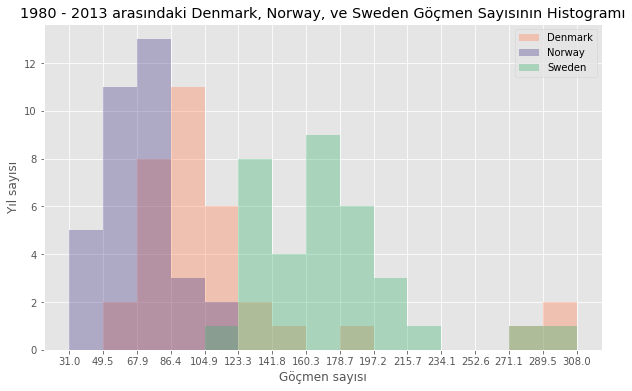

In [10]:
count, bin_edges=np.histogram(df_t,15)

df_t.plot(kind="hist",figsize=(10,6),bins=15,alpha=0.35,xticks=bin_edges,color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('1980 - 2013 arasındaki Denmark, Norway, ve Sweden Göçmen Sayısının Histogramı')
plt.ylabel('Yıl sayısı')
plt.xlabel('Göçmen sayısı')

plt.show()

Aşağıdaki kod bloğu ile matplotlib içerisindeki tüm kullanılabilir renklerin listesi alınabilir.
<code>
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
</code>

Eğer grafikte binlerin üst üste gelmesini ve farklı renkler görünmesini istemiyorsanız <code>stacked</code> parametresini kullanabiliriz. Aynı zamanda x eksenindeki fazla boşlukları silmek istiyorsak <code>xlim</code> parametresi kullanılabilir.

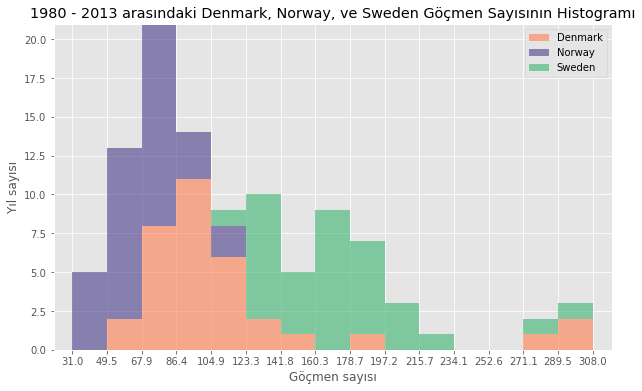

In [11]:
count, bin_edges=np.histogram(df_t,15)

xmin = bin_edges[0] - 10   #  ilk bin değerine estetik görünsün diye buffer değer ekliyoruz.
xmax = bin_edges[-1] + 10  #  son bin değerine estetik görünsün diye buffer değer ekliyoruz.

df_t.plot(kind="hist",
          figsize=(10,6),
          bins=15,
          alpha=0.60,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax))

plt.title('1980 - 2013 arasındaki Denmark, Norway, ve Sweden Göçmen Sayısının Histogramı')
plt.ylabel('Yıl sayısı')
plt.xlabel('Göçmen sayısı')

plt.show()